In [5]:
# ＧＤＰデータ(2160×4320×26年分）を読み込んで、2000年のものを抽出してnumpyに変換して保存する
import netCDF4 as nc
import numpy as np

dataset = nc.Dataset('GDP_per_capita_PPP_1990_2015_v2.nc')
gdp = dataset.variables['GDP_per_capita_PPP'][10]

# MaskedArrayを通常のnumpy配列に変換
gdp_filled = np.ma.filled(gdp, fill_value=np.nan)

# numpy配列を保存
np.save('gdp_2000.npy', gdp_filled)

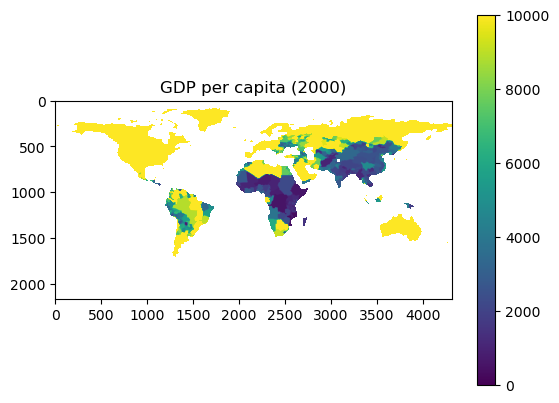

In [19]:
#とりあえず、GDPデータを描画してみる
import matplotlib.pyplot as plt
plt.imshow(gdp_filled)
plt.colorbar()
#plt.xlim(3825,3850)
#plt.ylim(670,640)]
#カラーバーの範囲を調整
plt.clim(0,10000)
plt.title('GDP per capita (2000)')
plt.show()




In [23]:
#上位20%大都市に関して、縦軸に気候データをとって、横軸に一人当たりGDPをとって、散布図を描く。各都市の人口の大きさを半径であらわす
import matplotlib.pyplot as plt
import numpy as np

#years = [900, 1400, 1700, 1850, 1950, 2000]
years=[2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

# 各年ごとのデータを格納する辞書
pop_count_data = {}
pop_density_data = {}
class_labels = {}

# 各年ごとにデータを読み込む
for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    class_labels[year] = np.load(f'class_labels_20_{year}.npy')
    print(class_labels[year][4])



for year in years:
    for model in models:
        total_population = np.zeros(5)
        MAT = np.load(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy')
        MAP = np.load(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy')


        

        


2614.94422189


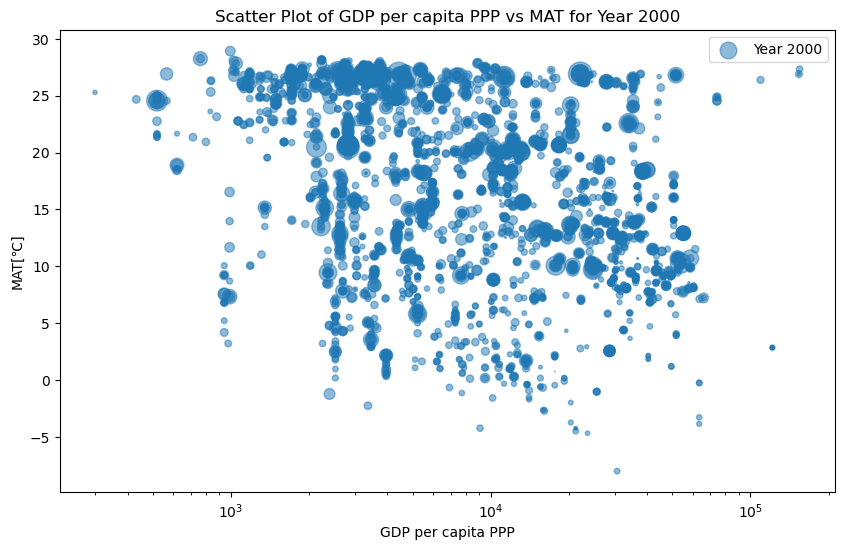

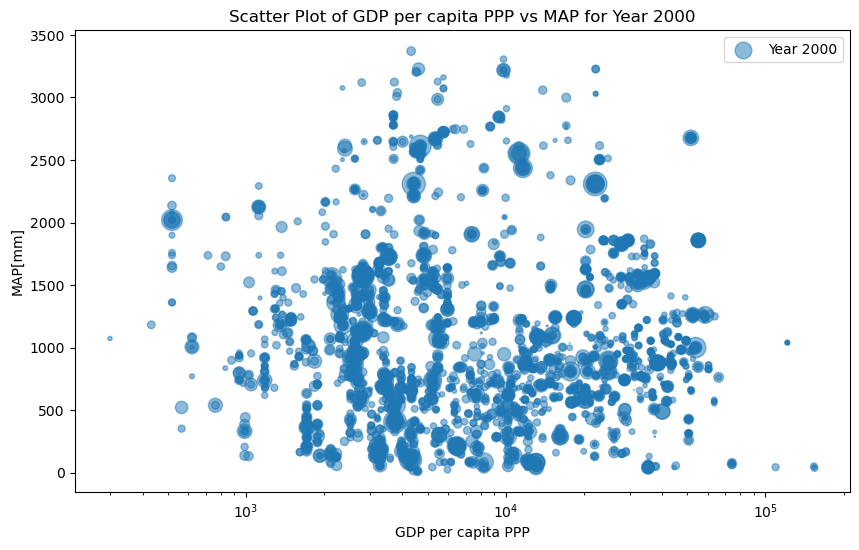

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 年代の設定
years = [2000]

# 各年ごとのデータを格納する辞書
pop_count_data = {}
pop_density_data = {}
class_labels = {}

# 各年ごとにデータを読み込む
for year in years:
    pop_count_data[year] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[year] = np.load(f"pop_density_data_{year}.npy")
    class_labels[year] = np.load(f'class_labels_20_{year}.npy')

# 各年のデータを処理
for year in years:
    
    # MATデータを読み込む
    MAT = np.load(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy')
    # MAPデータを読み込む
    MAP = np.load(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy')
    # GDPデータを読み込む
    GDP = np.load('gdp_2000.npy')
    
    # 人口密度がclass_labels[year][4]以上のグリッドを抽出
    threshold = class_labels[year][4]
    indices = np.where(pop_density_data[year] >= threshold)
    
    # 抽出したグリッドのMAT、MAP、GDP、pop_countデータを取得
    MAT_values = MAT[indices]
    MAP_values = MAP[indices]
    GDP_values = GDP[indices]
    pop_counts = pop_count_data[year][indices]
    
    # MATとGDPの散布図を描画
    plt.figure(figsize=(10, 6))
    plt.scatter(GDP_values, MAT_values, s=pop_counts / 10000, alpha=0.5, label=f'Year {year}')
    plt.xscale('log')
    plt.xlabel('GDP per capita PPP')
    plt.ylabel('MAT[℃]')
    plt.title(f'Scatter Plot of GDP per capita PPP vs MAT for Year {year}')
    plt.legend()
    plt.show()
    
    # MAPとGDPの散布図を描画
    plt.figure(figsize=(10, 6))
    plt.scatter(GDP_values, MAP_values, s=pop_counts / 10000, alpha=0.5, label=f'Year {year}')
    plt.xscale('log')
    plt.xlabel('GDP per capita PPP')
    plt.ylabel('MAP[mm]')
    plt.title(f'Scatter Plot of GDP per capita PPP vs MAP for Year {year}')
    plt.legend()
    plt.show()